In [1]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
df = pd.read_excel('BreastCancer_Prognostic_v1.xlsx')
df.head()

,ID,Outcome,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


In [2]:
df.drop('ID',axis=1,inplace=True)

df=df[df.Lymph_Node_Status!='?']

In [3]:
df.describe()

,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,Worst_texture,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,46.938144,17.402320,22.300979,114.781495,969.092268,0.102774,0.142642,0.156309,0.086808,0.192885,...,30.180258,140.136907,1401.756701,0.143921,0.364567,0.436010,0.178449,0.322251,0.090777,2.867526
std,34.523646,3.171672,4.335292,21.430694,353.159959,0.012607,0.050229,0.070942,0.033962,0.027679,...,6.067777,28.826843,587.040705,0.022092,0.165528,0.174757,0.045529,0.074068,0.021371,1.950588
min,1.000000,10.950000,10.380000,71.900000,361.600000,0.074970,0.046050,0.023980,0.020310,0.130800,...,16.670000,85.100000,508.100000,0.081910,0.051310,0.023980,0.028990,0.156500,0.055040,0.400000
25%,14.250000,15.052500,19.342500,98.160000,702.525000,0.093900,0.109850,0.106075,0.063760,0.174075,...,26.210000,117.925000,940.575000,0.129325,0.247550,0.322150,0.152225,0.275950,0.076368,1.500000
50%,39.500000,17.290000,21.795000,113.700000,929.100000,0.102200,0.131750,0.152050,0.086075,0.189350,...,30.305000,136.500000,1295.000000,0.141750,0.350450,0.401150,0.178500,0.310300,0.086540,2.500000
75%,73.000000,19.580000,24.782500,129.650000,1193.500000,0.111375,0.172200,0.200500,0.103925,0.209550,...,33.625000,159.875000,1694.250000,0.154450,0.423675,0.550175,0.207125,0.358475,0.101775,3.500000
max,125.000000,27.220000,39.280000,182.100000,2250.000000,0.144700,0.311400,0.426800,0.201200,0.304000,...,49.540000,232.200000,3903.000000,0.222600,1.058000,1.170000,0.290300,0.663800,0.207500,10.000000


In [4]:
df.Outcome.unique()

array(['N', 'R'], dtype=object)

In [5]:
df.to_csv('clean-data.csv')

In [6]:

import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [7]:
df=pd.read_csv('clean-data.csv')
df.drop('Unnamed: 0',axis=1, inplace=True)

In [8]:
le=LabelEncoder()
df['Outcome']=le.fit_transform(df["Outcome"])
df.head()

,Outcome,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
0,0,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,0,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,0,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,0,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,1,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


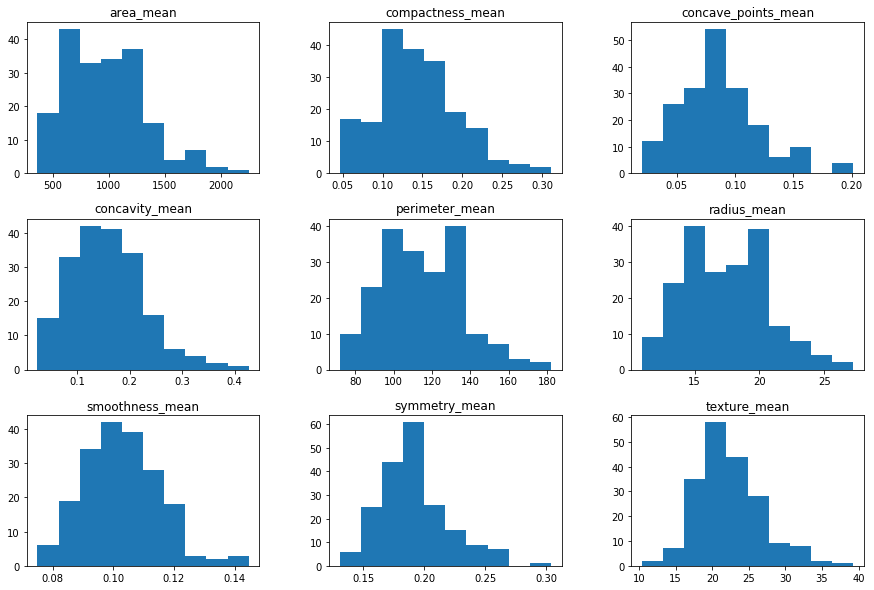

In [9]:
data_mean=df.ix[:,2:11]
hist_mean=data_mean.hist(bins=10, figsize=(15, 10),grid=False,)

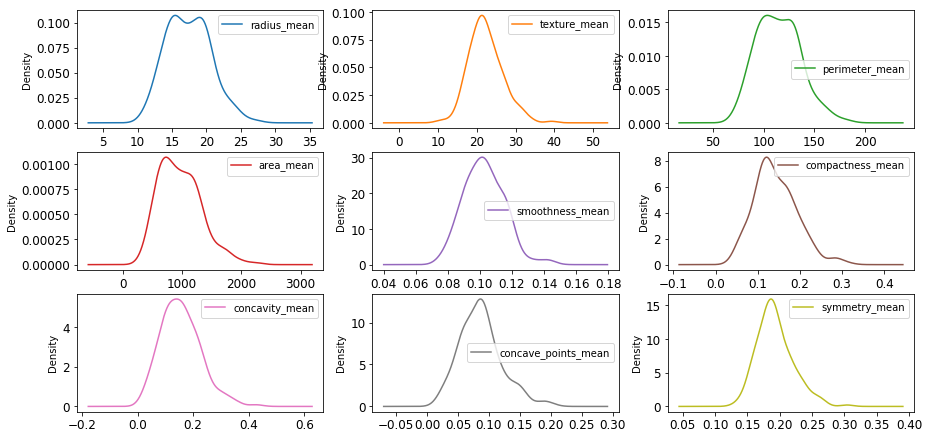

In [10]:
plt = data_mean.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
                     sharey=False,fontsize=12, figsize=(15,10))

In [11]:
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
train_set,test_set = split_train_test(df, 0.2)
print(len(train_set), "train +", len(test_set), "test") 

156 train + 38 test


In [13]:
train_s=train_set.values
train_x=train_s[:,1:]
train_y=train_s[:,0]

In [14]:
from sklearn.preprocessing import StandardScaler

# Normalize the  data (center around 0 and scale to remove the variance).
scaler =StandardScaler()
Xs = scaler.fit_transform(train_x)
Xs

array([[-0.88145414,  3.11239288, -0.12603593, ..., -0.46844817,
         0.51508756,  0.10903401],
       [ 0.87507359, -1.39219251, -1.66472958, ...,  1.16915711,
        -0.21540025, -0.62254901],
       [ 0.28956435, -0.816278  ,  0.20602258, ..., -1.01873301,
         0.02809568, -0.62254901],
       ...,
       [ 0.61159443, -0.27460705, -0.37391059, ...,  0.36757847,
        -0.94588806, -0.43965325],
       [-0.94000507, -0.48629455,  0.49131228, ..., -1.12693508,
        -0.45889619,  0.10903401],
       [-0.82290322,  0.72468245,  1.48748781, ...,  0.40070156,
         1.4890713 ,  2.1208873 ]])

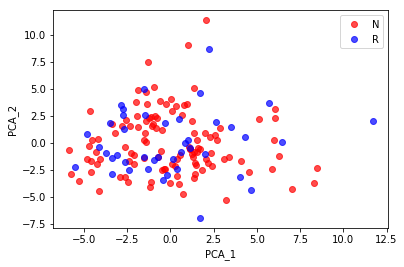

In [15]:
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
# feature extraction
pca = PCA(n_components=4)
fit = pca.fit(Xs)
X_pca = pca.transform(Xs)

PCA_df = pd.DataFrame()

PCA_df['PCA_1'] = X_pca[:,0]
PCA_df['PCA_2'] = X_pca[:,1]

plt.plot(PCA_df['PCA_1'][df.Outcome == 0],PCA_df['PCA_2'][df.Outcome == 0],'o', alpha = 0.7, color = 'r')
plt.plot(PCA_df['PCA_1'][df.Outcome == 1],PCA_df['PCA_2'][df.Outcome == 1],'o', alpha = 0.7, color = 'b')

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['N','R'])
plt.show()

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, random_state=1) 
lr.fit(train_x, train_y) 

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
test_s=test_set.values
test_set1=test_s[:,0]
test_set2=test_s[:,1:]



In [18]:
y=lr.predict(test_set2)
y

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [19]:
lr.score(test_set2,test_set1)

0.8947368421052632

In [20]:
test_set1

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [21]:
var= pca.explained_variance_ratio_

In [22]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

In [23]:
print(var1)

[29.18 54.21 65.22 72.03]


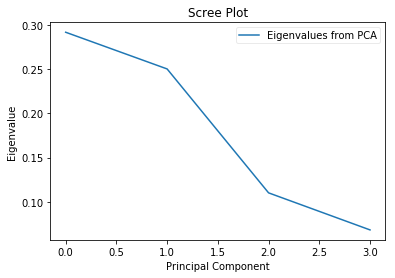

In [24]:
plt.plot(var)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

leg = plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3,shadow=False,markerscale=0.4)
leg.get_frame().set_alpha(0.4)
leg.draggable(state=True)
plt.show()

In [25]:
from scipy.stats import norm


from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


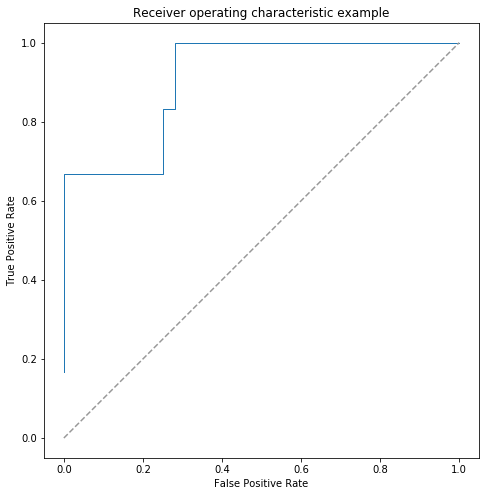

In [26]:
from sklearn.metrics import roc_curve, auc
%matplotlib inline
# Plot the receiver operating characteristic curve (ROC).
plt.figure(figsize=(10,8))
probas_ = lr.predict_proba(test_set2)
fpr, tpr, thresholds = roc_curve(test_set1, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC fold (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.axes().set_aspect(1)

In [27]:
cm=metrics.confusion_matrix(test_set1, y)
print(" true positive = ",cm[0][0],"\n false positive = ",cm[0][1],"\n false negative = ",cm[1][0],"\n true negative = ",cm[1][1] )

 true positive =  30 
 false positive =  2 
 false negative =  2 
 true negative =  4


In [28]:
acc=(cm[0][0]+cm[1][1])/len(y)
print("accuracy of the model = ",acc)

accuracy of the model =  0.8947368421052632


In [29]:
ms=(cm[0][1]+cm[1][0])/len(y)
print("misclassification rate = ",ms)

misclassification rate =  0.10526315789473684


In [30]:
tp=cm[0][0]/len(y)
fn=cm[0][1]/len(y)
print("True  positive rate = ",tp , "\nfalse postive rate = ",fn)

True  positive rate =  0.7894736842105263 
false postive rate =  0.05263157894736842


In [31]:
#wr=pd.Series(y,test_set1)
wr=pd.DataFrame([[y,test_set1]],columns=["predicted","actual"])
wr.to_csv("predicted.csv")

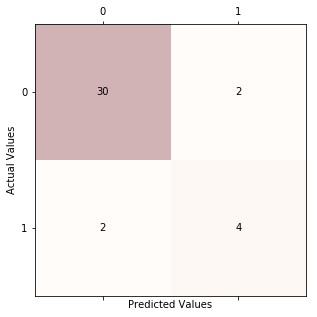

             precision    recall  f1-score   support

        0.0       0.94      0.94      0.94        32
        1.0       0.67      0.67      0.67         6

avg / total       0.89      0.89      0.89        38



In [32]:
import matplotlib.pyplot as plt

from IPython.display import Image, display

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()
print(classification_report(test_set1, y ))

In [33]:
train =       train_set[train_set['Outcome']==1] #### finding the patient details which have outcome 'R'
train =       train.values
train_x1 = train[:,2:]
train_y1 =  train[:,1]
test=test_set[test_set['Outcome']==1]
test=test.values
test_x1=test[:,2:]
test_y1=test[:,1]

In [34]:
#support vector regression
from sklearn import svm 
reg = svm.SVR()
reg.fit(train_x1,train_y1)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
reg.predict(test_x1)

In [ ]:
reg.score(test_x1,test_y1)
#actually model is underfitting the data